In [36]:
import pandas as pd
import numpy as np
import re
import pandas as pd
import csv

In [37]:
from plotnine import *
import folium

In [38]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
# 그래프 그리는 모듈 matplotlib.pyplot

%matplotlib inline
# 그래프의 결과를  출력 세션에 나타나게 하는 설정

In [69]:
# 한글 폰트 설정

import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows' :
    path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
else :
    print("Nope")
    
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

# '계약종별 전력사용량 (월별)' 파일 읽기

In [40]:
df = pd.read_excel('power usage by contract type.xls',
                   header = 13,
                  encoding='utf-8')

df.head()

,년월,시구,시군구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh)
0,201812,강원도,전체,가로등,"115,339","17,303,418","1,869,861,015",108.1
1,201812,강원도,전체,교육용,"1,056","37,950,053","3,793,940,491",100.0
2,201812,강원도,전체,농사용,"103,185","54,322,167","2,781,537,853",51.2
3,201812,강원도,전체,산업용,"13,602","606,504,952","69,111,240,315",114.0
4,201812,강원도,전체,심 야,"90,856","202,859,645","15,192,211,176",74.9


무의미한 컬럼 정리

In [41]:
del df['년월']
del df['시군구']
del df['평균판매단가(원/kWh)']
df.head()

,시구,계약구분,고객호수(호),사용량(kWh),전기요금(원)
0,강원도,가로등,"115,339","17,303,418","1,869,861,015"
1,강원도,교육용,"1,056","37,950,053","3,793,940,491"
2,강원도,농사용,"103,185","54,322,167","2,781,537,853"
3,강원도,산업용,"13,602","606,504,952","69,111,240,315"
4,강원도,심 야,"90,856","202,859,645","15,192,211,176"


In [42]:
df.tail()

,시구,계약구분,고객호수(호),사용량(kWh),전기요금(원)
135,충청북도,합계,"1,065,629","2,333,639,535","260,938,704,494"
136,황해북도,산업용,4,"183,066","26,747,173"
137,황해북도,일반용,9,"344,108","46,073,444"
138,황해북도,주택용,1,"10,634","1,014,628"
139,황해북도,합계,14,"537,808","73,835,245"


In [43]:
# 결측치 여부 확인

df.isnull().sum()

# 결측지 없음

시구          0
계약구분        0
고객호수(호)     0
사용량(kWh)    0
전기요금(원)     0
dtype: int64

object type 에서 int type 으로 변경해주기

In [44]:
def find_int(count):
    i = (re.findall(r'\d+', count))
    ints = int(''.join(map(str, i)))
    return ints

In [45]:
df['고객호수(호)']= df['고객호수(호)'].map(find_int)
df['사용량(kWh)']= df['사용량(kWh)'].map(find_int)
df['전기요금(원)']= df['전기요금(원)'].map(find_int)

In [46]:
df.head()

,시구,계약구분,고객호수(호),사용량(kWh),전기요금(원)
0,강원도,가로등,115339,17303418,1869861015
1,강원도,교육용,1056,37950053,3793940491
2,강원도,농사용,103185,54322167,2781537853
3,강원도,산업용,13602,606504952,69111240315
4,강원도,심 야,90856,202859645,15192211176


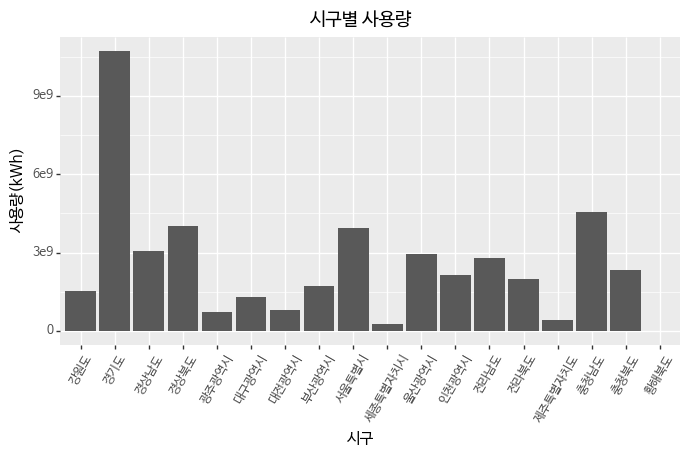

<ggplot: (-9223371914271932742)>

In [62]:
(ggplot(df)
 + aes(x='시구', y='사용량(kWh)')
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('시구별 사용량')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60), 
        figure_size=(8, 4))
)

# Group by

In [57]:
group = pd.DataFrame(df.groupby(['시구']).sum())
group.rename(columns={'사용량(kWh)' : '총사용량(kWh)'}, 
                   inplace=True)
group

#18개의 시구 존재

,고객호수(호),총사용량(kWh),전기요금(원)
시구,,,
강원도,2124000,3034951718,335947078724
경기도,8965568,21425768930,2501297523692
경상남도,3778348,6142629324,705407488164
경상북도,4031450,8033177162,874076966568
광주광역시,1090960,1433621406,174241618204
대구광역시,1882796,2640241900,317728492152
대전광역시,1169706,1600092064,189825341252
부산광역시,2564390,3447113542,425735246164
서울특별시,7210600,7898475280,993033578144


지역별 총사용량

In [55]:
amount_used=pd.DataFrame(df.groupby(['시구'])['사용량(kWh)'].sum())
amount_used.rename(columns={'사용량(kWh)' : '총사용량(kWh)'}, 
                   inplace=True)

In [56]:
amount_used

,총사용량(kWh)
시구,
강원도,3034951718
경기도,21425768930
경상남도,6142629324
경상북도,8033177162
광주광역시,1433621406
대구광역시,2640241900
대전광역시,1600092064
부산광역시,3447113542
서울특별시,7898475280


In [63]:
# 총 사용량 순서로 보기

amount_used.sort_values(by='총사용량(kWh)', ascending=True). head()

,총사용량(kWh)
시구,
황해북도,1075616
세종특별자치시,547424898
제주특별자치도,866390494
광주광역시,1433621406
대전광역시,1600092064


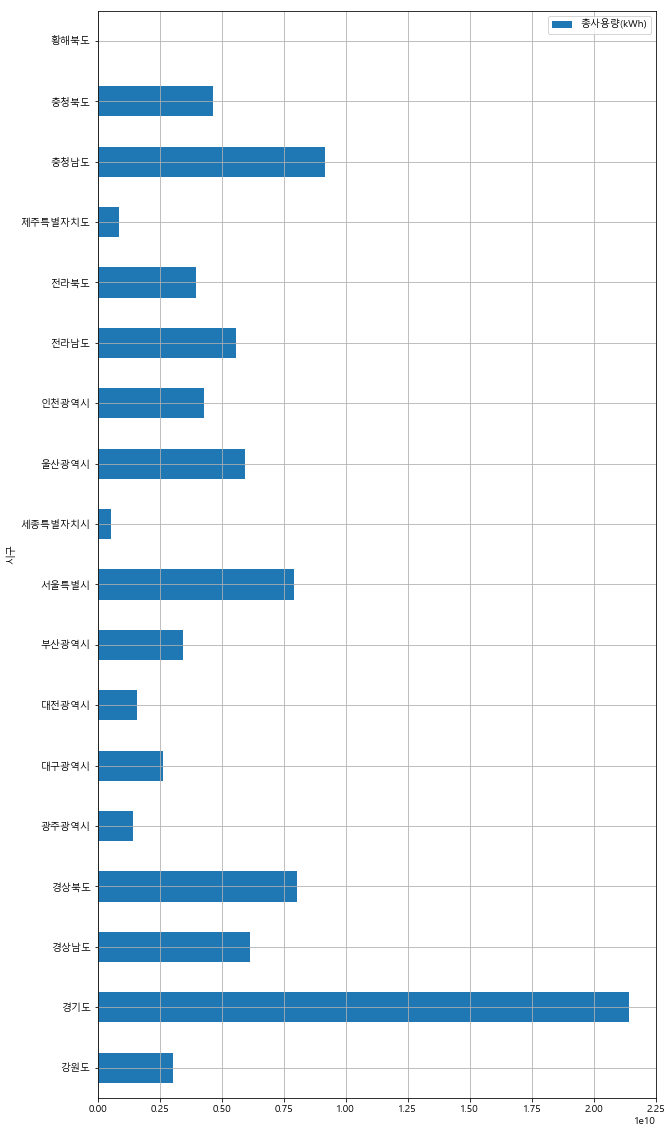

In [70]:
amount_used.plot(kind='barh', grid=True, figsize = (10,20))

지역별 총 고객호수

In [64]:
cus = pd.DataFrame(df.groupby(['시구'])['고객호수(호)'].sum())
cus

,고객호수(호)
시구,
강원도,2124000
경기도,8965568
경상남도,3778348
경상북도,4031450
광주광역시,1090960
대구광역시,1882796
대전광역시,1169706
부산광역시,2564390
서울특별시,7210600


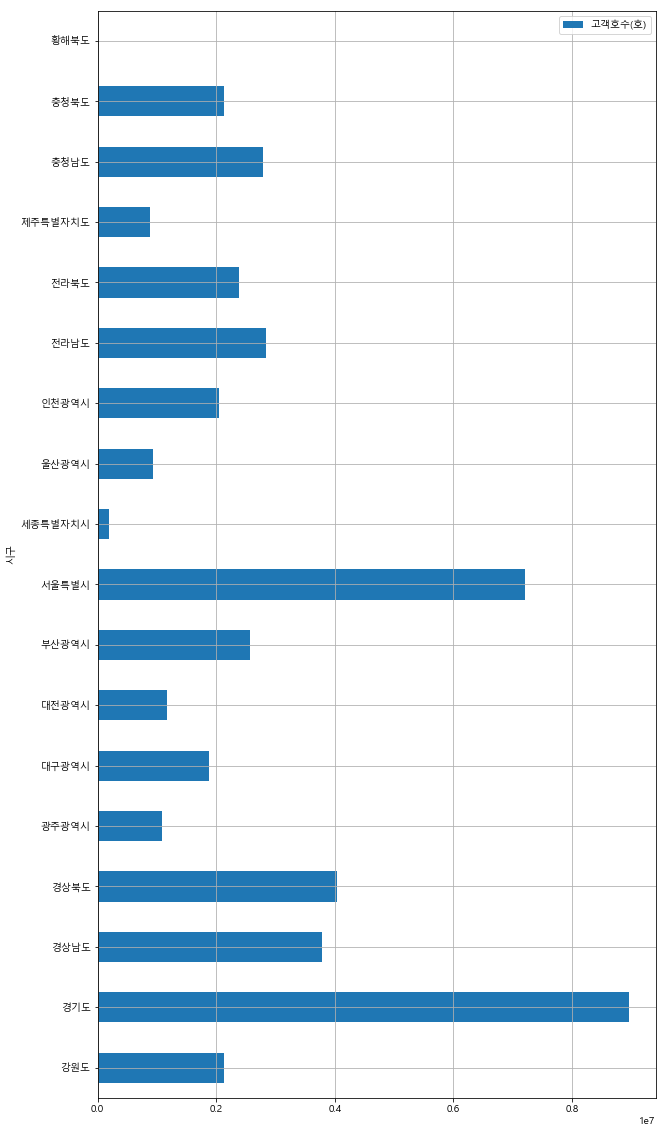

In [71]:
cus.plot(kind='barh', grid=True, figsize = (10,20))

지역별 평균호수별 사용량

In [72]:
sum = pd.DataFrame(df.groupby(['시구']).sum())
sum.head()

,고객호수(호),사용량(kWh),전기요금(원)
시구,,,
강원도,2124000,3034951718,335947078724
경기도,8965568,21425768930,2501297523692
경상남도,3778348,6142629324,705407488164
경상북도,4031450,8033177162,874076966568
광주광역시,1090960,1433621406,174241618204


In [74]:
sum['평균 호수별 사용량'] = sum['사용량(kWh)'] / sum['고객호수(호)']
sum.head()

,고객호수(호),사용량(kWh),전기요금(원),평균 호수별 사용량
시구,,,,
강원도,2124000,3034951718,335947078724,1428.884990
경기도,8965568,21425768930,2501297523692,2389.783774
경상남도,3778348,6142629324,705407488164,1625.744723
경상북도,4031450,8033177162,874076966568,1992.627259
광주광역시,1090960,1433621406,174241618204,1314.091631


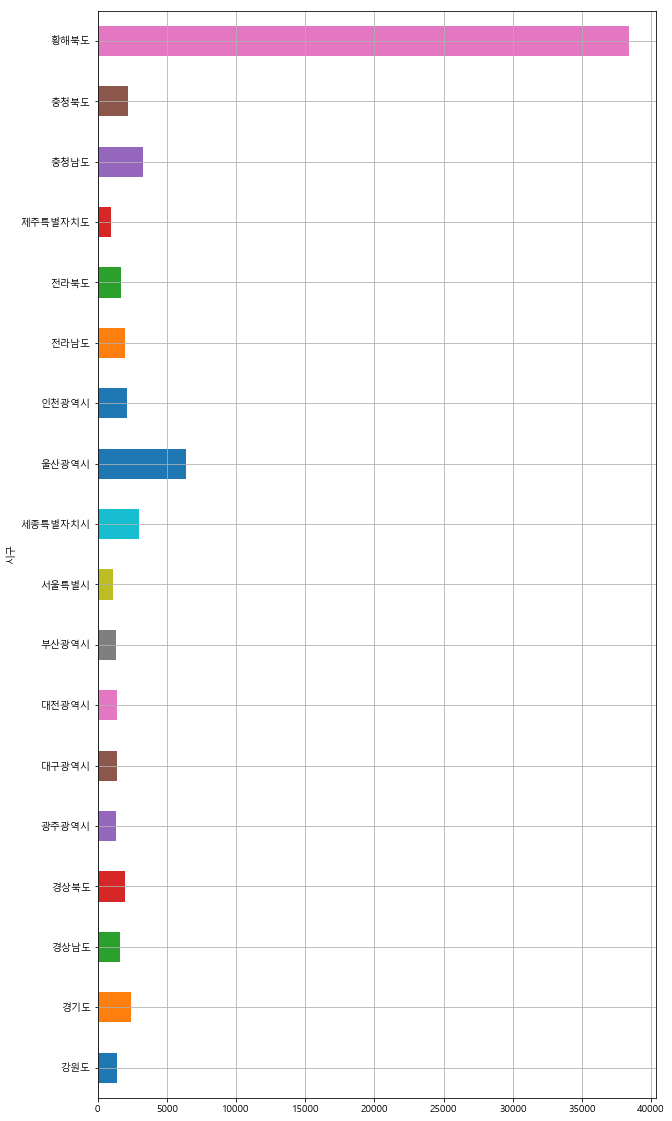

In [75]:
sum['평균 호수별 사용량'].plot(kind='barh', grid=True, figsize = (10,20))